<a href="https://colab.research.google.com/github/DennisWayo/Nordgren-FracSim/blob/main/Implicitvalid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

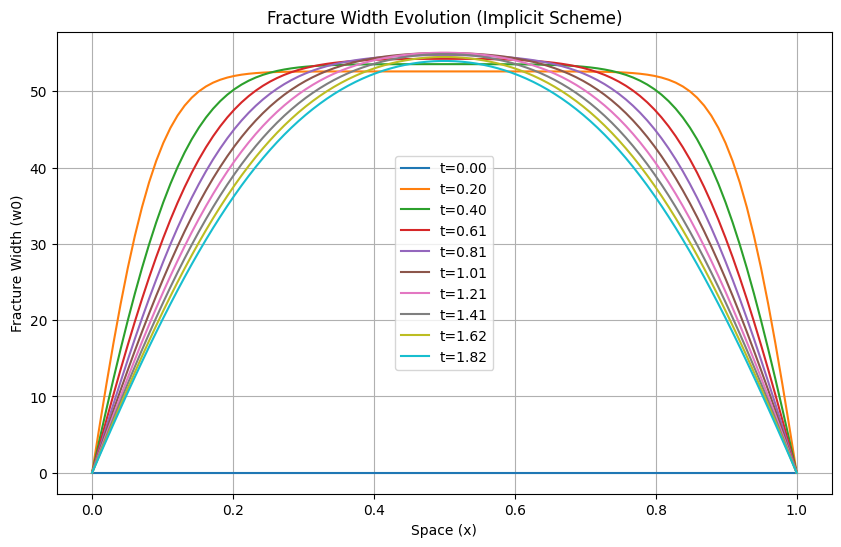

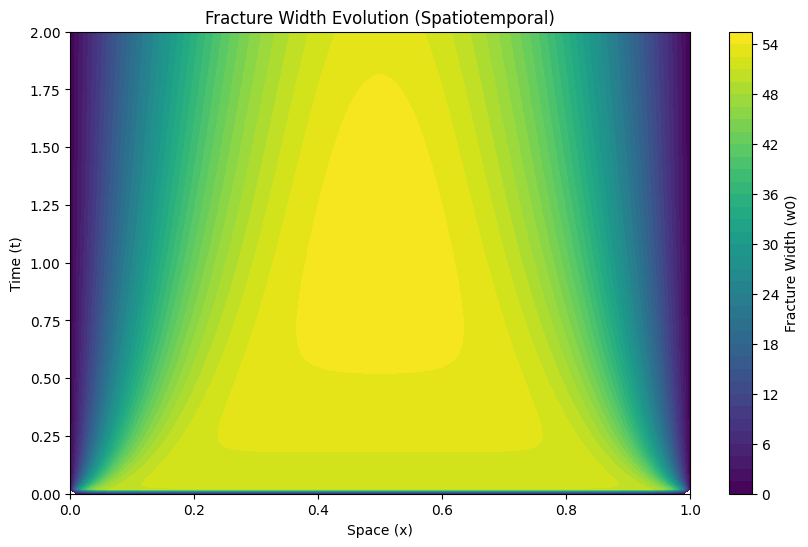

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
E_prime = 30.0  # Effective modulus
mu = 8.0  # Viscosity
H = 2.0  # Fracture height
C_L = 1.0  # Leak-off coefficient
t_0 = 0.0  # Initial time

# Numerical parameters
L = 1.0  # Length of the domain (spatial)
T = 2.0  # Total time
Nx = 100  # Number of spatial points
Nt = 100  # Number of time steps

dx = L / (Nx - 1)  # Spatial step size
dt = T / Nt  # Time step size

x = np.linspace(0, L, Nx)  # Spatial grid
t = np.linspace(0, T, Nt)  # Time grid

# Initialize fracture width w0
w0 = np.zeros((Nx, Nt))  # Fracture width (space x time)
w0[:, 0] = 0.0  # Initial condition: fracture width is zero everywhere

# Coefficients for the implicit scheme
alpha = E_prime / (128 * mu * H * dx**2)
beta = 1 / dt

# Time-stepping using backward Euler
for n in range(0, Nt - 1):
    A = np.zeros((Nx, Nx))  # Coefficient matrix
    b = np.zeros(Nx)  # Right-hand side vector

    # Fill the coefficient matrix A and vector b
    for i in range(1, Nx - 1):
        A[i, i - 1] = -alpha
        A[i, i] = 2 * alpha + beta
        A[i, i + 1] = -alpha
        b[i] = beta * w0[i, n] + (8 * C_L) / (np.pi * np.sqrt(t[n] - t_0 + 1e-6))

    # Boundary conditions (Dirichlet w0=0 at boundaries)
    A[0, 0] = A[-1, -1] = 1
    b[0] = b[-1] = 0

    # Solve the linear system
    w0[:, n + 1] = np.linalg.solve(A, b)

# Plot results
plt.figure(figsize=(10, 6))
for n in range(0, Nt, Nt // 10):  # Plot at 10 equally spaced time steps
    plt.plot(x, w0[:, n], label=f"t={t[n]:.2f}")
plt.xlabel("Space (x)")
plt.ylabel("Fracture Width (w0)")
plt.title("Fracture Width Evolution (Implicit Scheme)")
plt.legend()
plt.grid()
plt.show()

# Spatiotemporal Contour Plot
X, T = np.meshgrid(x, t)
plt.figure(figsize=(10, 6))
plt.contourf(X, T, w0.T, levels=50, cmap="viridis")
plt.colorbar(label="Fracture Width (w0)")
plt.xlabel("Space (x)")
plt.ylabel("Time (t)")
plt.title("Fracture Width Evolution (Spatiotemporal)")
plt.show()